<center>Universidade Federal de Viçosa</center>
<center>Inteligência Artificial e Computacional</center>
<center>ELT579 - Tópicos Especiais em Inteligência Artificial</center>
<center>TURMA 2022/2</center>

**<center>Semana 2: Fenotipagem de tomateiro </center>**
<center>Aluno: Michel Batistin Fiorio</center>

**Objetivo:**

Nesta atividade temos a disposição um banco de dados de fenotipagem de tomateiro. Temos também um arquivo com o algoritmo onde foi desenvolvido um modelo de regressão para predição da severidade da doença 'Requeima' em plantas de tomate a partir de informações retiradas de imagens aéreas das plantas.

O modelo criado em aula foi uma regressão linear. Após realizada a otimização do modelo através do processo de redução de 'features' por eliminação recursiva, os resultados finais do modelo quando aplicado os dados de teste seguem abaixo:

RMSE 7.539476072281645

MAE 6.344066348951253

R2 0.8876342778703067

O objetivo dessa atividade é realizarmos melhorias no algoritmo fornecido, na tentativa de obter melhores resultados de predição.

**Metodologia**

Uma vez que temos o modelo de regressão linear como nossa referência, nossa metodologia consistirá em criar outros modelos lineares e otimizá-los. 
Apresentaremos os seguintes modelos:

- Máquina de vetor de suporte (Support Vector Regressor);
- K-vizinhos mais próximos (K-Neighbors Regressor);
- Árvore de regressão (Random Forest Regressor);
- Gradiente descendente estocástico (Stochastic Gradient Descent)

Técnicas de otimização utilizadas:

- Redução de features por eliminação recursiva;
- Redução de features por testes estatísticos (correlação cruzada);
- Otimização de hiperparâmetros através da redução da pontuação em teste de validação cruzada do modelo.

**Desenvolvimento**

### Importação das bibliotecas e configuração do banco de dados

Ocultaremos as células para otimização do relatório.

Como resultado do carregamento, configuração, divisão e padronização do banco de dados, temos como variáveis resultantes desse código:

- *X_train_sc* e *y_train*: banco de dados de treinamento. Composto por 20 features e 105 amostras.
- *X_test_sc* e *y_test*: banco de dados de teste. Composto por 20 features e 27 amostras.

In [1]:
# Importando bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import SGDRegressor
from skopt import gp_minimize

In [2]:
# Importando o dataset

df = pd.read_csv('dataset_problema2.csv')

# Separando dados de entrada e saída

X = df.drop(['id', 'Severidade'], axis = 1)
y = df['Severidade']

In [3]:
# Separar dados de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
# Padronização das variáveis

scaler = StandardScaler() #media 0 e desvio padrão 1

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [5]:
# Transformando dados do formato array para data frame
X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X_train.columns

### Modelo Linear Regression

Ocultaremos as células para otimização do relatório.

- Total de features utilizadas: 10

- Métricas finais no banco de dados de teste:

    RMSE: 7.539476072281645

    MAE: 6.344066348951253

    R2: 0.8876342778703067

In [6]:
# Criação do modelo Linear Regression.

modelo_linear = LinearRegression()

# Métrica na validação cruzada com todas as features

score = cross_val_score(modelo_linear, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.8417215821015457


Raiz do erro quadrático médio com 1 features: 22.999512866756277
Raiz do erro quadrático médio com 2 features: 20.978943999479593
Raiz do erro quadrático médio com 3 features: 12.213396211503518
Raiz do erro quadrático médio com 4 features: 11.313324687675097
Raiz do erro quadrático médio com 5 features: 8.638765107367252
Raiz do erro quadrático médio com 6 features: 8.673068527522164
Raiz do erro quadrático médio com 7 features: 8.758615941206587
Raiz do erro quadrático médio com 8 features: 8.882267359101977
Raiz do erro quadrático médio com 9 features: 7.6108000203906485
Raiz do erro quadrático médio com 10 features: 7.501372965771357
Raiz do erro quadrático médio com 11 features: 7.698979572979539
Raiz do erro quadrático médio com 12 features: 7.651101456136852
Raiz do erro quadrático médio com 13 features: 7.65535729186297
Raiz do erro quadrático médio com 14 features: 7.786765054041213
Raiz do erro quadrático médio com 15 features: 7.8650918758682575
Raiz do erro quadrático médio

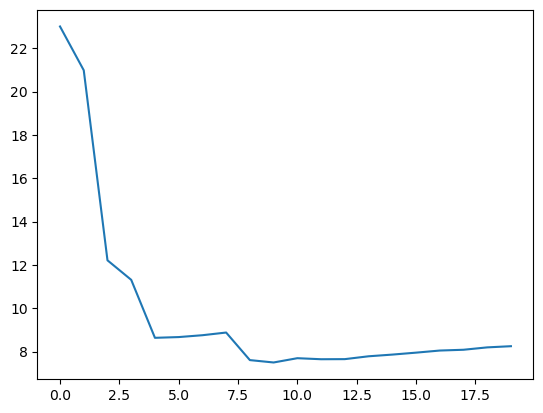

In [7]:
# Otimização do modelo com redução de features.

max_f = 20
lista_r2 = list()

for i in range(1, max_f+1):
  
  selector = RFE(modelo_linear, n_features_to_select=i, step=1)
  
  selector = selector.fit(X_train_sc, y_train)
  
  mask = selector.support_
  
  features = X_train_sc.columns
  
  sel_features = features[mask]

  X_sel = X_train_sc[sel_features]
  
  score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
  
  lista_r2.append(np.abs(np.mean(score)))
  
  print('Raiz do erro quadrático médio com', i, 'features:', np.abs(np.mean(score)))

# Desenhando o gráfico

plt.plot(lista_r2)

plt.show()

In [8]:
# Selecionar as 10 melhores features

selector = RFE(modelo_linear, n_features_to_select = 10, step=1)

# Ajuste do modelo
selector = selector.fit(X_train_sc, y_train)

# Obter a posição das features escolhidas
mask = selector.support_

# Obter o nome das features escolhidas
features = X_train_sc.columns
sel_features = features[mask]
print('Features escolhidas:', sel_features)

Features escolhidas: Index(['NDVI_d28', 'SAVI_d28', 'NDVI_d01', 'SAVI_d01', 'NDVI_d04', 'SAVI_d04',
       'NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'SR_d08'],
      dtype='object')


In [9]:
# Medindo a qualidade do modelo final escolhido (10 features) com validação cruzada

X_sel = X_train_sc[sel_features]
score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2')
print(np.mean(score))

0.8655536026355246


In [10]:
# Realizando o fit do modelo nos dados de treino

modelo_linear.fit(X_sel, y_train)

LinearRegression()

RMSE 7.539476072281645
MAE 6.344066348951253
R2 0.8876342778703067


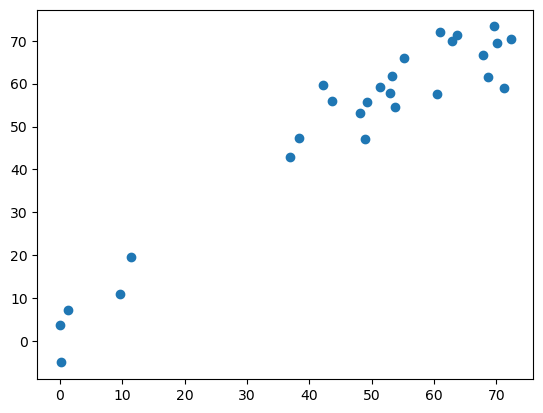

In [11]:
# Validação do modelo com dados de teste

y_pred = modelo_linear.predict(X_test_sc[sel_features])

# Score r2
r2 = modelo_linear.score(X_test_sc[sel_features], y_test)

# Raiz do erro médio quadratico
rmse = (mean_squared_error(y_test, y_pred))**0.5

# Erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)


plt.scatter(y_test, y_pred)

plt.show()


### Modelo SVM

- Utilizado a função SVR da biblioteca sklearn.
- Total de features utilizadas: 11
- Hiperparâmetros ótimos:

    kernel = 'linear'
    
    C = 0.7477685854264121
    
    epsilon = 0.2
    
- Métricas finais no banco de dados de teste:

    RMSE: 7.549409799360181
    
    MAE: 6.316490162041271
    
    R2: 0.887337985198477

In [12]:
# Criação do modelo SVR.

modelo_svr = SVR(kernel='linear')

# Métrica na validação cruzada com todas as 20 features

score = cross_val_score(modelo_svr, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.8418575624521859


Raiz do erro quadrático médio com 1 features: 12.221629248870624
Raiz do erro quadrático médio com 2 features: 9.361250510569322
Raiz do erro quadrático médio com 3 features: 8.590474767720318
Raiz do erro quadrático médio com 4 features: 8.100292905190596
Raiz do erro quadrático médio com 5 features: 8.121443925350965
Raiz do erro quadrático médio com 6 features: 7.927422971714151
Raiz do erro quadrático médio com 7 features: 7.866770501412274
Raiz do erro quadrático médio com 8 features: 7.8573921086750165
Raiz do erro quadrático médio com 9 features: 7.878544169370767
Raiz do erro quadrático médio com 10 features: 7.804848009470764
Raiz do erro quadrático médio com 11 features: 7.701366834904137
Raiz do erro quadrático médio com 12 features: 7.7762699289641946
Raiz do erro quadrático médio com 13 features: 7.791143374165543
Raiz do erro quadrático médio com 14 features: 7.852210908764515
Raiz do erro quadrático médio com 15 features: 7.941314682760319
Raiz do erro quadrático médio c

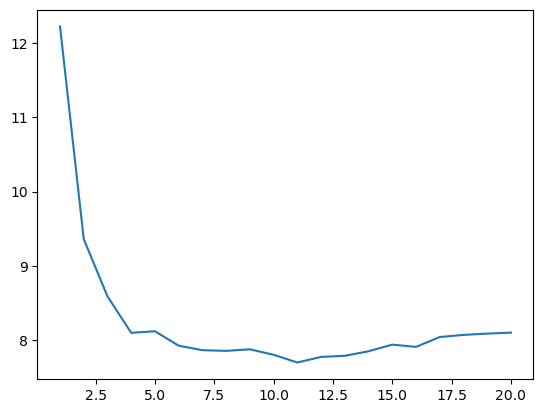

In [13]:
# Otimização do modelo com redução de features.

max_f = 20
lista_r2 = list()

for i in range(1, max_f+1):
  
  selector = RFE(modelo_svr, n_features_to_select=i, step=1)
  
  selector = selector.fit(X_train_sc, y_train)
  
  mask = selector.support_
  
  features = X_train_sc.columns
  
  sel_features = features[mask]

  X_sel = X_train_sc[sel_features]
  
  score = cross_val_score(modelo_svr, X_sel, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
  
  lista_r2.append(np.abs(np.mean(score)))
  
  print('Raiz do erro quadrático médio com', i, 'features:', np.abs(np.mean(score)))

# Desenhando o gráfico

plt.plot(np.arange(1,21), lista_r2)

plt.show()

In [14]:
# Selecionar as 11 melhores features

selector = RFE(modelo_svr, n_features_to_select = 11, step=1)

# Ajuste do modelo
selector = selector.fit(X_train_sc, y_train)

# Obter a posição das features escolhidas
mask = selector.support_

# Obter o nome das features escolhidas
features = X_train_sc.columns
sel_features = features[mask]
print('Features escolhidas:', sel_features)

Features escolhidas: Index(['SR_d28', 'NDVI_d01', 'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01',
       'SAVI_d04', 'SR_d04', 'GNDVI_d08', 'MCARI1_d08', 'SR_d08'],
      dtype='object')


In [15]:
# Medindo a qualidade do modelo (11 features) com validação cruzada

X_sel = X_train_sc[sel_features]
score = cross_val_score(modelo_svr, X_sel, y_train, cv = 10, scoring = 'r2')
print(np.mean(score))

0.8576277631327727


In [20]:
# Otimização dos hiperparâmetros do modelo SVR

parametros = [(0.1, 6),
             (0.05, 0.2)]

# Definindo função

def treinar_modelo_svr(parametros):
    
    modelo_svr = SVR(C = parametros[0], epsilon = parametros[1], kernel='linear')

    score = cross_val_score(modelo_svr, X_sel, y_train, 
                            cv = 10)
       
    return -np.mean(score)

# Rodando a otimização

otimos = gp_minimize(treinar_modelo_svr, parametros, random_state = 0, 
                     verbose = False, n_calls = 50, 
                     n_random_starts = 10)
print('Parâmetros ótimos:\n', otimos.x)

# Ajustando hiperparâmetros do modelo ótimo

modelo_svr = SVR(C = otimos.x[0], epsilon = otimos.x[1], kernel='linear')

Parâmetros ótimos:
 [0.7477685854264121, 0.2]


In [21]:
# Realizando o fit do modelo nos dados de treino

modelo_svr.fit(X_sel, y_train)

SVR(C=0.7477685854264121, epsilon=0.2, kernel='linear')

RMSE 7.549409799360181
MAE 6.316490162041271
R2 0.887337985198477


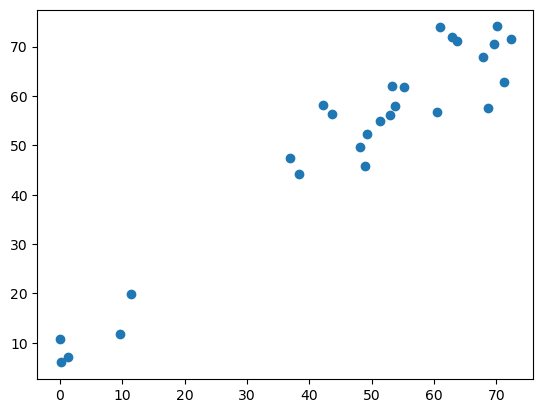

In [22]:
# Validação do modelo com dados de teste

y_pred = modelo_svr.predict(X_test_sc[sel_features])

# Score r2
r2 = modelo_svr.score(X_test_sc[sel_features], y_test)

# Raiz do erro médio quadratico
rmse = (mean_squared_error(y_test, y_pred))**0.5

# Erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)


plt.scatter(y_test, y_pred)

plt.show()


### Modelo K-vizinhos mais próximos
- Utilizado a função KNeighborsRegressor da biblioteca sklearn.
- Total de features utilizadas: 12
- Hiperparâmetros ótimos:

    n_neighbors = 5
    
    weights = 'distance'
    
    p = 4
    
- Métricas finais no banco de dados de teste:

    RMSE: 6.740755361735086
    
    MAE: 5.665257021903322
    
    R2: 0.9101809113157263


In [29]:
# Criação do modelo K-neighbors Regressor.

modelo_knr = KNeighborsRegressor()

# Métrica na validação cruzada com todas as features

score = cross_val_score(modelo_knr, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.9155721886631305


Raiz do erro quadrático médio com 1 features: 10.321780766195019
Raiz do erro quadrático médio com 2 features: 9.169559172198692
Raiz do erro quadrático médio com 3 features: 8.75010784796853
Raiz do erro quadrático médio com 4 features: 8.847811826004243
Raiz do erro quadrático médio com 5 features: 9.079866072419799
Raiz do erro quadrático médio com 6 features: 9.103119410504668
Raiz do erro quadrático médio com 7 features: 8.305668026450979
Raiz do erro quadrático médio com 8 features: 8.19939130839084
Raiz do erro quadrático médio com 9 features: 8.351199507083958
Raiz do erro quadrático médio com 10 features: 6.7202950355507465
Raiz do erro quadrático médio com 11 features: 5.974048220003848
Raiz do erro quadrático médio com 12 features: 5.851114824226636
Raiz do erro quadrático médio com 13 features: 5.9746919679357875
Raiz do erro quadrático médio com 14 features: 6.292164943782945
Raiz do erro quadrático médio com 15 features: 6.293292920694415
Raiz do erro quadrático médio com

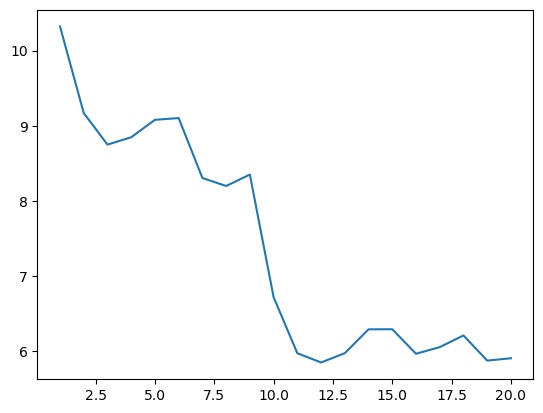

In [24]:
# Otimização do modelo com redução de features.

max_f = 20
lista_r2 = list()

for i in range(1, max_f+1):
  
  selector = SelectKBest(f_regression, k=i)
  
  X_train_sel = selector.fit_transform(X_train_sc,y_train)
  
  score = cross_val_score(modelo_knr, X_train_sel, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
  
  lista_r2.append(np.abs(np.mean(score)))
  
  print('Raiz do erro quadrático médio com', i, 'features:', np.abs(np.mean(score)))

# Desenhando o gráfico

plt.plot(np.arange(1,21), lista_r2)

plt.show()

In [30]:
# Ajuste do banco de dados com as melhores features (12 features)

selector = SelectKBest(f_regression, k=12)

selector.fit_transform(X_train_sc,y_train)

# Obter o nome das features selecionadas

features = selector.get_feature_names_out(X_train_sc.columns)
print('Features escolhidas:', features)


Features escolhidas: ['NDVI_d28' 'GNDVI_d28' 'SR_d28' 'NDVI_d04' 'SAVI_d04' 'MCARI1_d04'
 'SR_d04' 'NDVI_d08' 'SAVI_d08' 'GNDVI_d08' 'MCARI1_d08' 'SR_d08']


In [31]:
# Medindo a qualidade do modelo com validação cruzada para as 12 features

score = cross_val_score(modelo_knr, X_train_sc[features], y_train, cv = 10, scoring = 'r2')
print(np.mean(score))

0.9169151713373802


In [35]:
# Grupo de Parâmetros para otimização do modelo KNN

parametros = [(1, 15),
             ('uniform', 'distance'),
             (1, 8)]

# Definindo função

def treinar_modelo_knr(parametros):
    
    modelo_knr = KNeighborsRegressor(n_neighbors=parametros[0], 
                                      weights=parametros[1], 
                                      p=parametros[2])

    score = cross_val_score(modelo_knr, X_train_sc[features], y_train, 
                            cv = 10)
    
    return -np.mean(score)

# Rodando a otimização

otimos = gp_minimize(treinar_modelo_knr, parametros, random_state = 0, 
                     verbose = False, n_calls = 50, n_random_starts = 10)

print('Parâmetros ótimos:\n',otimos.x)

# Ajustando hiperparâmetros do modelo ótimo
modelo_knr = KNeighborsRegressor(n_neighbors=otimos.x[0], 
                                  weights=otimos.x[1], p=otimos.x[2])

C:\Users\mbfio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\mbfio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\mbfio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Parâmetros ótimos:
 [5, 'distance', 4]


In [36]:
# Fazendo o fit do modelo final

modelo_knr.fit(X_train_sc[features], y_train)


KNeighborsRegressor(p=4, weights='distance')

RMSE 6.740755361735086
MAE 5.665257021903322
R2 0.9101809113157263


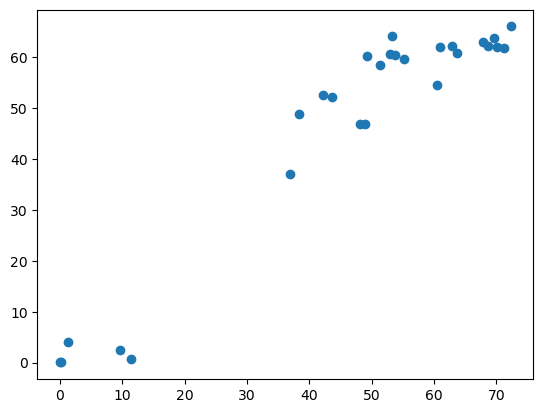

In [37]:
# Validação do modelo com dados de teste

y_pred = modelo_knr.predict(X_test_sc[features])

# Score r2
r2 = modelo_knr.score(X_test_sc[features], y_test)

# Raiz do erro médio quadratico
rmse = (mean_squared_error(y_test, y_pred))**0.5

# Erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)


plt.scatter(y_test, y_pred)

plt.show()


### Modelo de árvore de regressão (Random Forest)

- Utilizado a função RandomForestRegressor da biblioteca sklearn.
- Total de features utilizadas: 8
- Hiperparâmetros ótimos:

    criterion = 'poisson'
    
    n_estimators = 112
    
    max_depth = 27
    
    min_samples_split = 3
    
    min_samples_leaf = 3
    
    
    
- Métricas finais no banco de dados de teste:

    RMSE 7.108878664593916
    
    MAE 6.071396553789547
    
    R2 0.9001027078946373

In [38]:
# Criação do modelo Random Forest Regressor.

modelo_rf = RandomForestRegressor(n_estimators=200, max_depth = 10, min_samples_split = 2, 
                                  min_samples_leaf = 5, random_state = 0)

# Métrica na validação cruzada com todas as features

score = cross_val_score(modelo_rf, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.8417055072793378


Raiz do erro quadrático médio com 1 features: 10.904085527062014
Raiz do erro quadrático médio com 2 features: 9.663412315282935
Raiz do erro quadrático médio com 3 features: 9.308898816959783
Raiz do erro quadrático médio com 4 features: 9.066635506044843
Raiz do erro quadrático médio com 5 features: 8.978950213721278
Raiz do erro quadrático médio com 6 features: 7.885333656250291
Raiz do erro quadrático médio com 7 features: 7.82298595199301
Raiz do erro quadrático médio com 8 features: 7.598875007323078
Raiz do erro quadrático médio com 9 features: 7.690320461840081
Raiz do erro quadrático médio com 10 features: 7.710568310875777
Raiz do erro quadrático médio com 11 features: 7.666194563741895
Raiz do erro quadrático médio com 12 features: 7.739912641905856
Raiz do erro quadrático médio com 13 features: 7.810129886855842
Raiz do erro quadrático médio com 14 features: 7.966613889327358
Raiz do erro quadrático médio com 15 features: 7.904536134374507
Raiz do erro quadrático médio com 

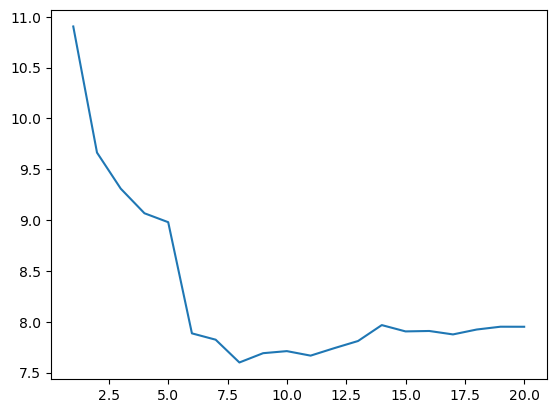

In [39]:
# Otimização do modelo com redução de features.

max_f = 20
lista_r2 = list()

for i in range(1, max_f+1):
  
  selector = RFE(modelo_rf, n_features_to_select=i, step=1)
  
  selector = selector.fit(X_train_sc, y_train)
  
  mask = selector.support_
  
  features = X_train_sc.columns
  
  sel_features = features[mask]

  X_sel = X_train_sc[sel_features]
  
  score = cross_val_score(modelo_rf, X_sel, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
  
  lista_r2.append(np.abs(np.mean(score)))
  
  print('Raiz do erro quadrático médio com', i, 'features:', np.abs(np.mean(score)))

# Desenhando o gráfico

plt.plot(np.arange(1,21), lista_r2)

plt.show()

In [40]:
# Selecionar as 8 melhores features

selector = RFE(modelo_rf, n_features_to_select = 8, step=1)

# Ajuste do modelo
selector = selector.fit(X_train_sc, y_train)

# Obter a posição das features escolhidas
mask = selector.support_

# Obter o nome das features escolhidas
features = X_train_sc.columns
sel_features = features[mask]
print('Features escolhidas:', sel_features)

Features escolhidas: Index(['NDVI_d28', 'GNDVI_d28', 'MCARI1_d04', 'NDVI_d08', 'SAVI_d08',
       'GNDVI_d08', 'MCARI1_d08', 'SR_d08'],
      dtype='object')


In [41]:
# Medindo a qualidade do modelo (8 features) com validação cruzada

X_sel = X_train_sc[sel_features]
score = cross_val_score(modelo_rf, X_sel, y_train, cv = 10, scoring = 'r2')
print(np.mean(score))

0.8531817860006765


In [43]:
# Grupo de Parâmetros para otimização do modelo Random Forest

parametros = [('squared_error', 'friedman_mse', 'poisson'),
             (100, 1000),
             (3,30),
             (2,12),
             (1,10)]

# Definindo a função de treino do modelo

def treinar_modelo_rf(parametros):
    
    modelo_rf = RandomForestRegressor(criterion = parametros[0], 
                                       n_estimators = parametros[1], 
                                       max_depth = parametros[2], 
                                       min_samples_split = parametros[3], 
                                       min_samples_leaf = parametros[4], 
                                       random_state = 0)
    score = cross_val_score(modelo_rf, X_sel, y_train, cv = 10)
    
    return -np.mean(score)

# Rodando a otimização do modelo

otimos = gp_minimize(treinar_modelo_rf, parametros, random_state = 0, 
                     verbose = False, n_calls = 40, n_random_starts = 10)

print('Parâmetros ótimos:\n', otimos.x)

# Ajustando hiperparâmetros do modelo ótimo obtido
modelo_rf = RandomForestRegressor(criterion = otimos.x[0], 
                                   n_estimators = otimos.x[1], 
                                   max_depth = otimos.x[2], 
                                   min_samples_split = otimos.x[3], 
                                   min_samples_leaf = otimos.x[4], 
                                   random_state = 0)

C:\Users\mbfio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Parâmetros ótimos:
 ['poisson', 112, 27, 3, 3]


In [44]:
# Realizando o fit do modelo nos dados de treinamento

modelo_rf.fit(X_sel, y_train)


RandomForestRegressor(criterion='poisson', max_depth=27, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=112, random_state=0)

RMSE 7.108878664593916
MAE 6.071396553789547
R2 0.9001027078946373


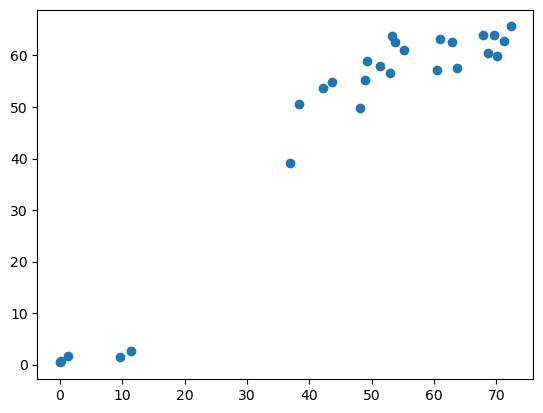

In [45]:
# Validação do modelo com dados de teste

y_pred = modelo_rf.predict(X_test_sc[sel_features])

# Score r2
r2 = modelo_rf.score(X_test_sc[sel_features], y_test)

# Raiz do erro médio quadratico
rmse = (mean_squared_error(y_test, y_pred))**0.5

# Erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)


plt.scatter(y_test, y_pred)

plt.show()


### Modelo Stochastic Gradient Descent

- Utilizado a função RandomForestRegressor da biblioteca sklearn.
- Total de features utilizadas: 14
- Hiperparâmetros ótimos:

    loss = 'squared_error'
    
    alpha = 0.001
    
- Métricas finais no banco de dados de teste:

    RMSE 7.9617154223605295
    
    MAE 6.570979333134384
    
    R2 0.8746960350234616

In [46]:
# Criação do modelo SGD Regressor

modelo_sgd = SGDRegressor(random_state=0)

# Métrica na validação cruzada com todas as features

score = cross_val_score(modelo_sgd, X_train_sc, y_train, cv = 10)

print(np.mean(score))

0.8460368754784984


Raiz do erro quadrático médio com 1 features: 12.237032177373067
Raiz do erro quadrático médio com 2 features: 9.097632065327712
Raiz do erro quadrático médio com 3 features: 8.15710806023775
Raiz do erro quadrático médio com 4 features: 7.85731955007829
Raiz do erro quadrático médio com 5 features: 7.997948053475929
Raiz do erro quadrático médio com 6 features: 7.9391118474806275
Raiz do erro quadrático médio com 7 features: 7.901939953978743
Raiz do erro quadrático médio com 8 features: 7.878421457512671
Raiz do erro quadrático médio com 9 features: 7.875554939568249
Raiz do erro quadrático médio com 10 features: 7.725854642920895
Raiz do erro quadrático médio com 11 features: 7.736369657799614
Raiz do erro quadrático médio com 12 features: 7.74450867787972
Raiz do erro quadrático médio com 13 features: 7.726278071129826
Raiz do erro quadrático médio com 14 features: 7.712665746833705
Raiz do erro quadrático médio com 15 features: 7.749486783629168
Raiz do erro quadrático médio com 1

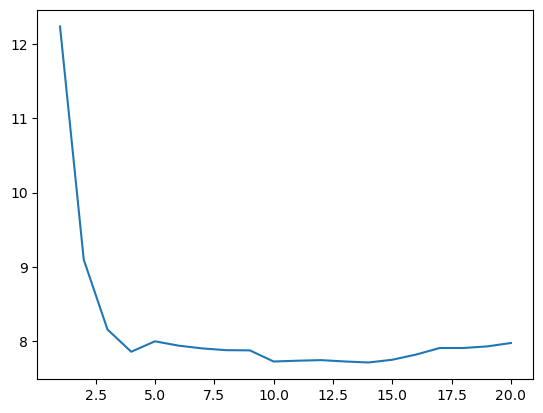

In [47]:
# Otimização do modelo com redução de features.

max_f = 20
lista_r2 = list()

for i in range(1, max_f+1):
  
  selector = RFE(modelo_sgd, n_features_to_select=i, step=1)
  
  selector = selector.fit(X_train_sc, y_train)
  
  mask = selector.support_
  
  features = X_train_sc.columns
  
  sel_features = features[mask]

  X_sel = X_train_sc[sel_features]
  
  score = cross_val_score(modelo_sgd, X_sel, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
  
  lista_r2.append(np.abs(np.mean(score)))
  
  print('Raiz do erro quadrático médio com', i, 'features:', np.abs(np.mean(score)))

# Desenhando o gráfico

plt.plot(np.arange(1,21), lista_r2)

plt.show()

In [48]:
# Selecionar as 14 melhores features

selector = RFE(modelo_sgd, n_features_to_select = 14, step=1)

# Ajuste do modelo
selector = selector.fit(X_train_sc, y_train)

# Obter a posição das features escolhidas
mask = selector.support_

# Obter o nome das features escolhidas
features = X_train_sc.columns
sel_features = features[mask]
print('Features escolhidas:', sel_features)

Features escolhidas: Index(['MCARI1_d28', 'SR_d28', 'NDVI_d01', 'SAVI_d01', 'GNDVI_d01',
       'MCARI1_d01', 'SR_d01', 'NDVI_d04', 'SAVI_d04', 'GNDVI_d04', 'SR_d04',
       'GNDVI_d08', 'MCARI1_d08', 'SR_d08'],
      dtype='object')


In [49]:
# Medindo a qualidade do modelo final escolhido (14 features) com validação cruzada

X_sel = X_train_sc[sel_features]
score = cross_val_score(modelo_sgd, X_sel, y_train, cv = 10, scoring = 'r2')
print(np.mean(score))

0.8546060463328946


In [50]:
# Grupo de Parâmetros para otimização do modelo SGD

parametros = [('squared_error', 'huber', 'epsilon_insensitive'),
             (0.0001, 0.001)]

# Definindo a função de treino do modelo

def treinar_modelo_sgd(parametros):
    
    modelo_sgd = SGDRegressor(loss = parametros[0], 
                                       alpha = parametros[1], 
                                       random_state = 0)
    score = cross_val_score(modelo_sgd, X_sel, y_train, cv = 10)
    
    return -np.mean(score)

# Rodando a otimização do modelo

otimos = gp_minimize(treinar_modelo_sgd, parametros, random_state = 0, 
                     verbose = False, n_calls = 40, n_random_starts = 10)

print('Parâmetros ótimos:\n', otimos.x)

# Ajustando hiperparâmetros do modelo ótimo obtido
modelo_sgd = SGDRegressor(loss = otimos.x[0], 
                                   alpha = otimos.x[1], 
                                   random_state = 0)

C:\Users\mbfio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\mbfio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\mbfio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\mbfio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\mbfio\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\mbfio\

Parâmetros ótimos:
 ['squared_error', 0.001]


In [52]:
# Realizando o fit do modelo nos dados de treino

modelo_sgd.fit(X_sel, y_train)


SGDRegressor(alpha=0.001, random_state=0)

RMSE 7.9617154223605295
MAE 6.570979333134384
R2 0.8746960350234616


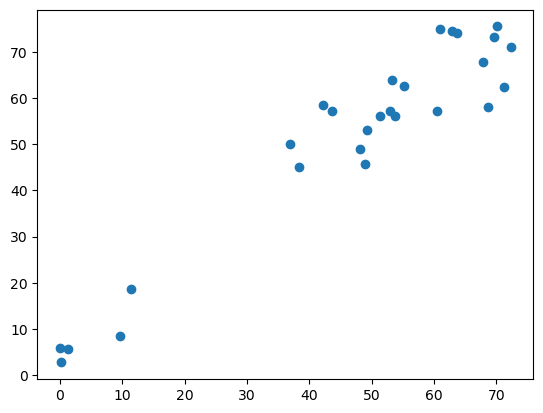

In [53]:
# Validação do modelo com dados de teste

y_pred = modelo_sgd.predict(X_test_sc[sel_features])

# Score r2
r2 = modelo_sgd.score(X_test_sc[sel_features], y_test)

# Raiz do erro médio quadratico
rmse = (mean_squared_error(y_test, y_pred))**0.5

# Erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)


plt.scatter(y_test, y_pred)

plt.show()


**Conclusão:**

Realizamos a modelagem e otimização de quatro regressores lineares distintos. 

O melhor resultado obtido foi o modelo que utilizou a técnica **K-vizinhos mais próximos**. 

Esse modelo obteve a métrica **r2 = 0.9101809113157263** para os dados de teste.

Foram utilizadas nesse modelo **12 das 20** features disponíveis. O método de seleção de importância das features foi realizado através da função 'SelectKBest'. Essa função cálcula o nível de importância de cada feature através de uma função de pontuação escolhida. No nosso caso escolhemos a pontuação calculada através da correlação cruzada entre as features e o dado alvo (y).